# Advanced Laboratory (MOD B)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from DataFormat    import RootFileFormat, DataHistogram
from read_data     import read_data
from plot_spectrum import plot_energy_spectrum, plot_time_spectrum

import glob
import os

## Constants

In [50]:
# path to data files
DATA_PATH = "./data/"
PLOT_PATH = "./plots/"

CALIBRATIONS = ("137Cs22Na", "60Co", "137Cs", "22Na", "133Ba")
DATA_PREFIX  = "HcompassF_"

DETECTORS = ("A", "B", "C", "D", "E")

SAVEFIG = False
FILE_EXT = ".pdf"

## Functions

In [51]:
def create_datasets(file_name):
    a_energy, a_time, b_energy, b_time, c_energy, c_time, d_energy, d_time, e_energy, e_time = read_data(file_name, RootFileFormat())
    a = DataHistogram(energy=a_energy, time=a_time)
    b = DataHistogram(energy=b_energy, time=b_time)
    c = DataHistogram(energy=c_energy, time=c_time)
    d = DataHistogram(energy=d_energy, time=d_time)
    e = DataHistogram(energy=e_energy, time=e_time)
    return a, b, c, d, e

## Spectrums

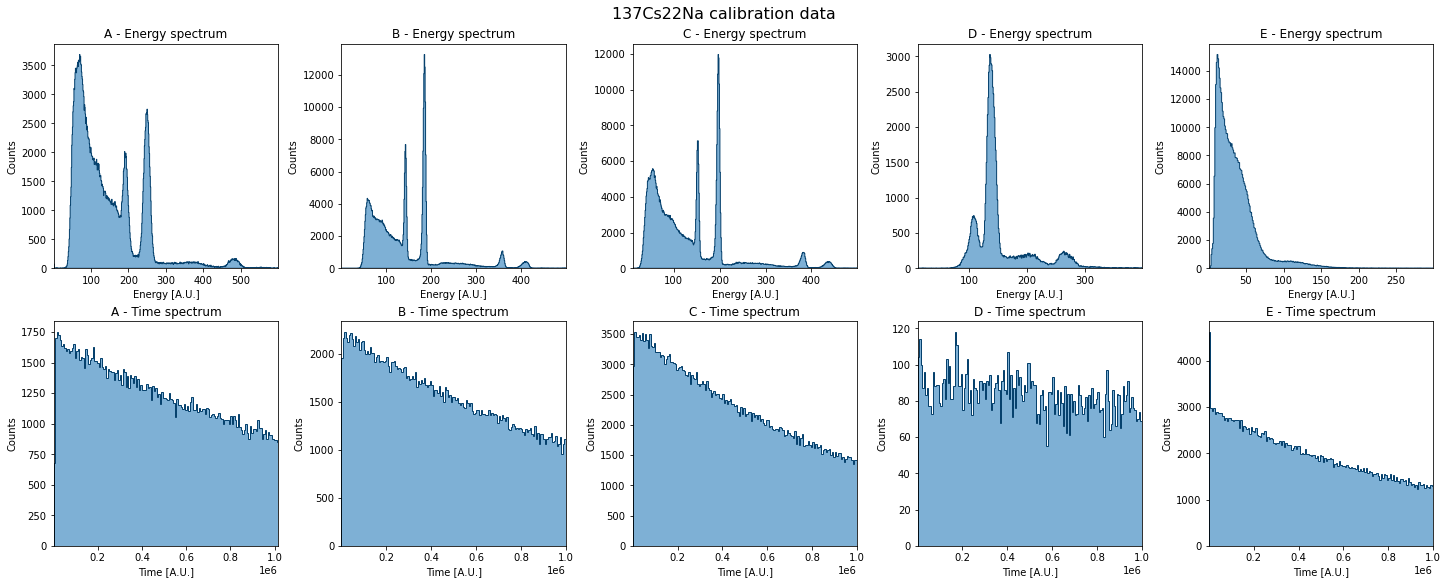

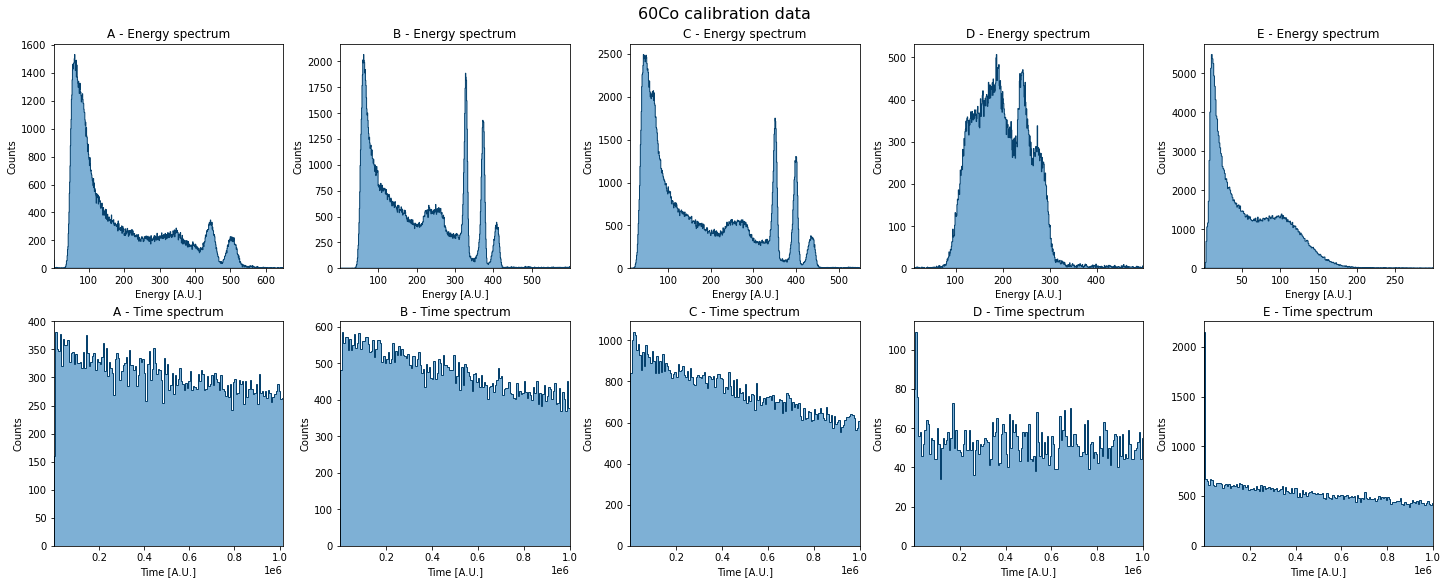

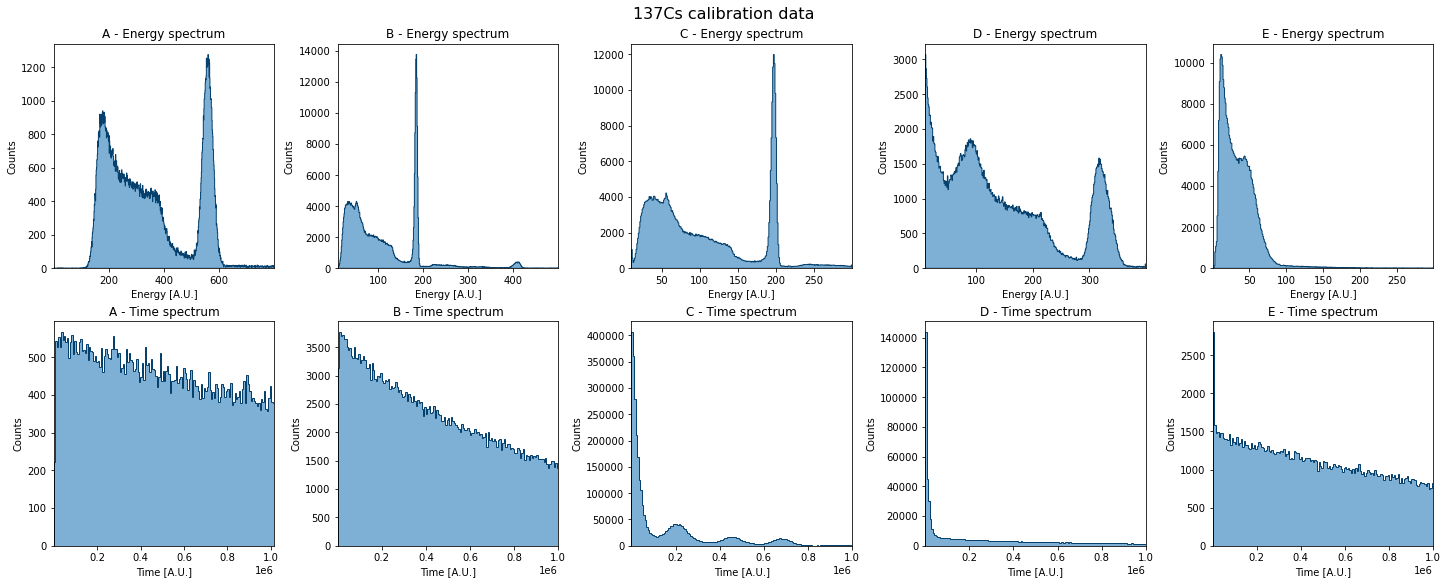

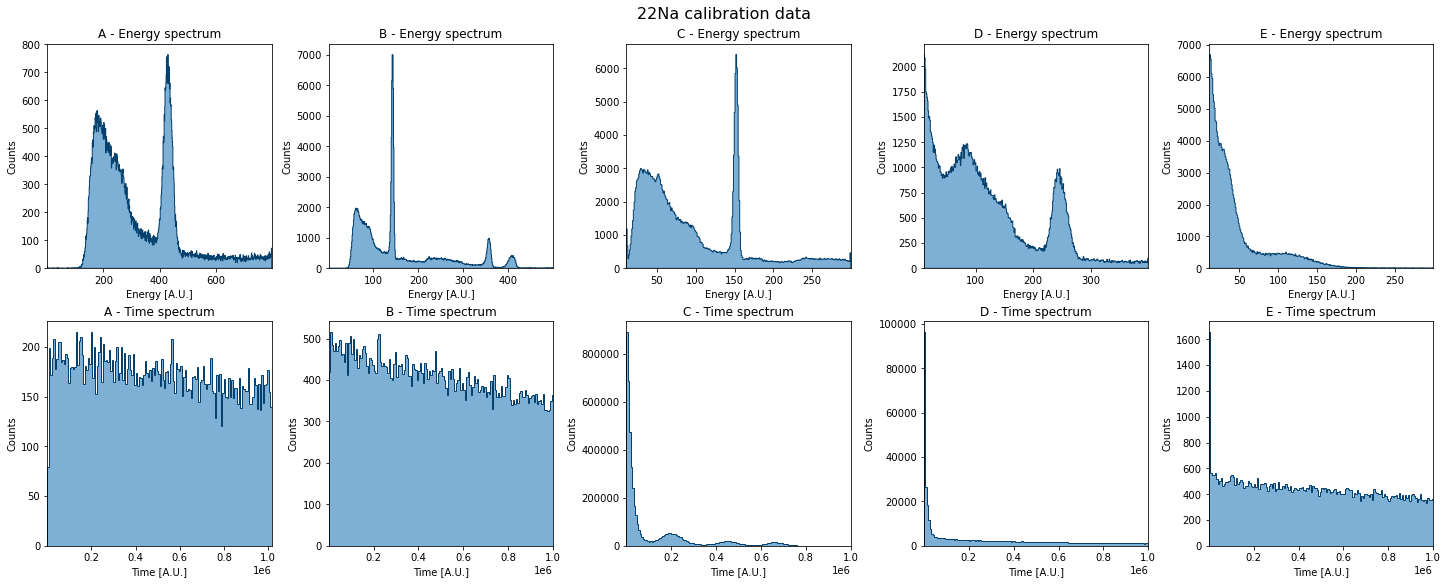

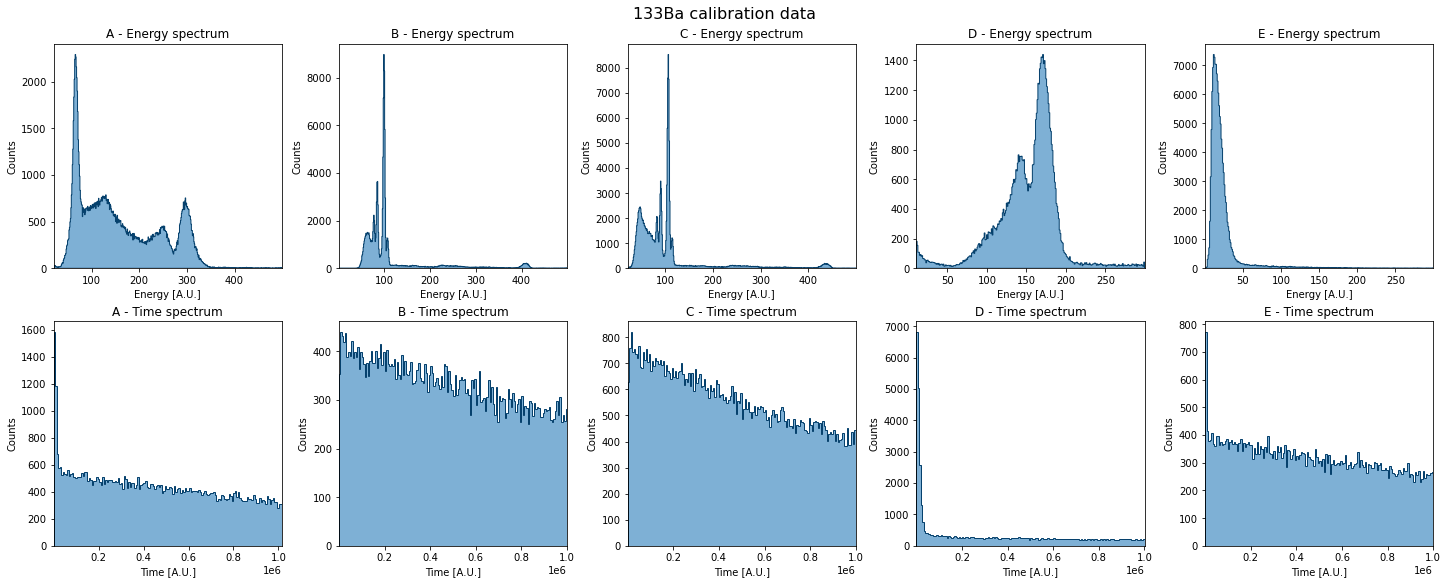

In [52]:
x_masks_left = [
    [0, 0, 10, 10, 0],  # 137Cs22Na
    [0, 0, 10, 10, 0],  # 60Co
    [0, 10, 10, 10, 0], # 137Cs
    [0, 0, 10, 10, 10], # 22Na
    [20, 0, 20, 10, 0]  # 133Ba
]

x_masks_right = [
    [600, 500, 500, 400, 300], # 137Cs22Na
    [650, 600, 550, 500, 300], # 60Co
    [800, 500, 300, 400, 300], # 137Cs
    [800, 500, 300, 400, 300], # 22Na
    [500, 500, 500, 300, 300]  # 133Ba
]

for j, calib_name in enumerate(CALIBRATIONS):

    file_name  = glob.glob(f"{DATA_PATH}/{DATA_PREFIX}{calib_name}_calibration*")[0]

    a, b, c, d, e = create_datasets(file_name)

    data_detectors = [a, b, c, d, e]

    fig = plt.figure(figsize=(20, 8), constrained_layout=True)
    fig.suptitle(f"{calib_name} calibration data", fontsize=16)

    for i, data in enumerate(data_detectors):
        
        e_bincenters = data.energy[0]
        e_binheights = data.energy[1]
        t_bincenters = data.time[0]
        t_binheights = data.time[1]
        
        e_filter = (e_bincenters > x_masks_left[j][i]) & (e_bincenters < x_masks_right[j][i])
        ax1 = plot_energy_spectrum(
            x             = e_bincenters, 
            y             = e_binheights, 
            energy_filter = e_filter,
            bins          = e_bincenters[e_filter], 
            fig           = fig, 
            title         = f"{DETECTORS[i]} - Energy spectrum",
            xlabel        = "Energy [A.U.]",
            nrows         = 2, 
            ncols         = 5, 
            idx           = 1+i
        )
        ax2 = plot_time_spectrum(
            x      = t_bincenters, 
            y      = t_binheights,
            bins   = 150,
            fig    = fig, 
            title  = f"{DETECTORS[i]} - Time spectrum",
            xlabel = "Time [A.U.]",
            nrows  = 2, 
            ncols  = 5, 
            idx    = 6+i
        )
    
    if SAVEFIG:
        folder = "calib-spectra"
        if not os.path.exists(f"{PLOT_PATH}/{folder}/"):
            os.makedirs(f"{PLOT_PATH}/{folder}/")
        plt.savefig(f"{PLOT_PATH}/{folder}/{calib_name}_spectra{FILE_EXT}", facecolor='w', edgecolor='w', transparent=False, dpi=300, bbox_inches='tight', pad_inches=0.1)
        
    plt.show() 
    